In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

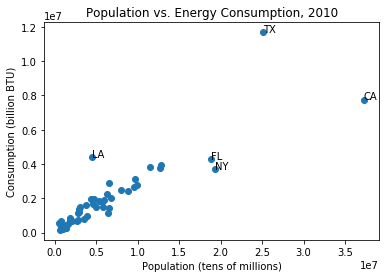

In [12]:
plt.scatter(nrg_data['CENSUS2010POP'], nrg_data['TotalC2010'])
plt.xlabel('Population (tens of millions)')
plt.ylabel('Consumption (billion BTU)')
plt.title('Population vs. Energy Consumption, 2010')
for row in nrg_data[nrg_data['StateCodes'].isin(['TX','CA','NY','FL','LA'])][['StateCodes','CENSUS2010POP','TotalC2010']].iterrows():
    plt.annotate(row[1]['StateCodes'],xy=(row[1]['CENSUS2010POP'], row[1]['TotalC2010']))
plt.show()

    The forty-eight lowest population states show a positive linear correlation with energy consumption, as one might expect. However, this model evidently does not hold for large populations, like California and Texas. California had 12 million more residents, but only used ~60% of the energy Texas did. Given the prominence of these two states in the energy landscape of the United States, further examination may be fruitful. 

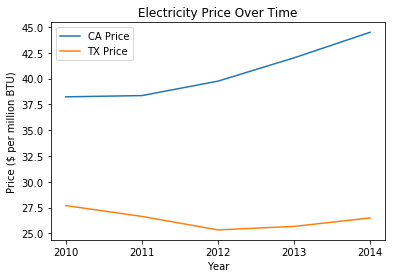

In [8]:
t = [2010,2011,2012,2013,2014]
ca_elec_price = [nrg_data.loc[nrg_data.index[4],'ElecPrice2010'], nrg_data.loc[nrg_data.index[4],'ElecPrice2011'], nrg_data.loc[nrg_data.index[4],'ElecPrice2012'], nrg_data.loc[nrg_data.index[4],'ElecPrice2013'], nrg_data.loc[nrg_data.index[4],'ElecPrice2014']]
tx_elec_price = [nrg_data.loc[nrg_data.index[42],'ElecPrice2010'], nrg_data.loc[nrg_data.index[42],'ElecPrice2011'], nrg_data.loc[nrg_data.index[42],'ElecPrice2012'], nrg_data.loc[nrg_data.index[42],'ElecPrice2013'], nrg_data.loc[nrg_data.index[42],'ElecPrice2014']]
plt.plot(t, ca_elec_price, label='CA Price')
plt.plot(t, tx_elec_price, label='TX Price')
plt.legend(loc='best')
plt.xticks(t)
plt.xlabel('Year')
plt.ylabel('Price ($ per million BTU)')
plt.title('Electricity Price Over Time')
plt.show()

    Perhaps one factor in consumption difference is electricity price. California juice was ~40% more expensive in 2010, and increased around $7. On the contrary, Texas electricity actually decreased. If price has anything to do with consumption, this may help explain the discrepancy. Examining the source of the price difference itself might be revealing.

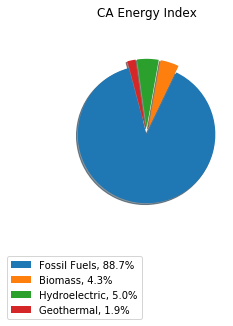

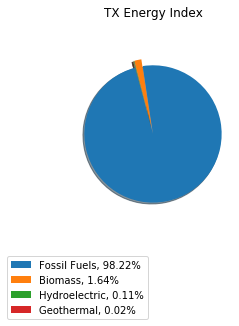

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
tx_biomassC2010 = nrg_data.loc[nrg_data.index[42],'BiomassC2010']
tx_fossfuelC2010 = nrg_data.loc[nrg_data.index[42],'FossFuelC2010']
tx_geoC2010 = nrg_data.loc[nrg_data.index[42],'GeoC2010']
tx_hydroC2010 = nrg_data.loc[nrg_data.index[42],'HydroC2010']

ca_biomassC2010 = nrg_data.loc[nrg_data.index[4],'BiomassC2010']
ca_fossfuelC2010 = nrg_data.loc[nrg_data.index[4],'FossFuelC2010']
ca_geoC2010 = nrg_data.loc[nrg_data.index[4],'GeoC2010']
ca_hydroC2010 = nrg_data.loc[nrg_data.index[4],'HydroC2010']


                    
labels = ['Fossil Fuels','Biomass', 'Hydroelectric', 'Geothermal']
sizes = [ca_fossfuelC2010, ca_biomassC2010, ca_hydroC2010, ca_geoC2010]
sizes2 = [tx_fossfuelC2010, tx_biomassC2010, tx_hydroC2010, tx_geoC2010]
explode = (0, .1, .1, .1)  # only "explode" the 2nd slice (i.e. 'Hogs')
sum = np.sum(sizes)
sum2 = np.sum(sizes2)
pcts = [(x / sum)*100 for x in sizes]
pcts2 = [(x / sum2)*100 for x in sizes2]

plt.subplot(1,2,1)
plt.pie(sizes, explode=explode,
        shadow=True, startangle=105)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('CA Energy Index')
plt.legend(labels = ['%s, %1.1f%%' % (l,s) for l,s in zip(labels, pcts)] , bbox_to_anchor=(0.5, -0.05))
plt.show()

plt.subplot(1,2,2)
plt.pie(sizes2, explode=explode, 
        shadow=True, startangle=105)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('TX Energy Index')
plt.legend(labels = ['%s, %1.2f%%' % (l,s) for l,s in zip(labels, pcts2)] , bbox_to_anchor=(0.5, -0.05))
plt.show()

    Now vexed by our dual quandries of consumption and price differences, a piece of the puzzle falls into place. According to the data set in question, Texas uses a larger portion of fossil fuels to keep the lights running than California. Speaking generally and without sources to validate, renewable sources of energy tend to be more expensive than traditional fossil fuels. Perhaps more expensive energy lowers consumption. DISCLAIMER: The data set does not include quantities of solar or wind energy produced, which may be non-negligable.

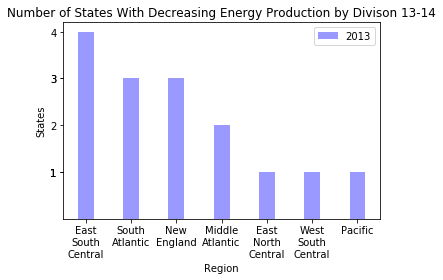

In [16]:
from textwrap import wrap
#plt.boxplot(nrg_data['TotalP13-14']-100,vert=False,showmeans=True)
#plt.show()

neg_p = nrg_data[nrg_data['TotalP13-14']-100 < 0]
count_list = neg_p.Division.value_counts().tolist()
n_groups = 6
fig, ax = plt.subplots()

index = np.arange(n_groups+1)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, count_list, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config, label='2013')


labels =  [
	'East South Central', 
	'South Atlantic', 
	'New England', 
	'Middle Atlantic', 
	'East North Central', 
	'West South Central', 
	'Pacific']
width = 9
labels = tuple(['\n'.join(wrap(l, width)) for l in labels ])
plt.xticks(index, labels)
plt.xlabel('Region')
plt.ylabel('States')
plt.title('Number of States With Decreasing Energy Production by Divison 13-14')
plt.xticks(index, labels)
plt.yticks(count_list)
plt.legend()

plt.tight_layout()
plt.show()



    Okay, we're up to our eyeballs in steers and surfboards, there are forty-eight other states, I get it. The states that slowed in energy production from 2013-2014 were mostly located in eastern regions of the census divisons. Two states in western pacific regions lowered production. For further analysis, perhaps migration data or GDP trends may be useful to illuminate this phenomenon. 

In [3]:
my_vars = pd.read_csv('Energy Census and Economic Data US 2010-2014.csv')
#print(my_vars)

energy_data = pd.DataFrame(my_vars)
nrg_data = energy_data.drop(energy_data.index[[50,51]])

coal_nrg_C2010_mean = nrg_data.CoalC2010.mean()
coal_nrg_C2014_mean = nrg_data.CoalC2014.mean()

biomass_nrg_C2010_mean = nrg_data.BiomassC2010.mean()
biomass_nrg_C2014_mean = nrg_data.BiomassC2014.mean()

fossfuel_nrg_C2010_mean = nrg_data.FossFuelC2010.mean()
fossfuel_nrg_C2014_mean = nrg_data.FossFuelC2014.mean()

geo_nrg_C2010_mean = nrg_data.GeoC2010.mean()
geo_nrg_C2014_mean = nrg_data.GeoC2010.mean()

hydro_nrg_C2010_mean = nrg_data.HydroC2010.mean()
hydro_nrg_C2014_mean = nrg_data.HydroC2014.mean()

natgas_nrg_C2010_mean = nrg_data.NatGasC2010.mean()
natgas_nrg_C2014_mean = nrg_data.NatGasC2014.mean()

tot_nrg_P2010_mean = nrg_data.TotalP2010.mean()
tot_nrg_P2014_mean = nrg_data.TotalP2014.mean()

print(tot_nrg_P2010_mean)
print(tot_nrg_P2014_mean)

#plt.plot(nrg_data['TotalC2014'])
#plt.show()


1377589.78
1655158.58


In [1]:
n_groups = 3

ca_biomassC2014 = nrg_data.loc[nrg_data.index[4],'BiomassC2014']
ca_fossfuelC2014 = nrg_data.loc[nrg_data.index[4],'FossFuelC2014']
ca_geoC2014 = nrg_data.loc[nrg_data.index[4],'GeoC2014']
ca_hydroC2014 = nrg_data.loc[nrg_data.index[4],'HydroC2014']


means_2010 = (ca_fossfuelC2010, ca_biomassC2010, ca_geoC2010, ca_hydroC2010)


means_2014 = (ca_fossfuelC2014, ca_biomassC2014, ca_geoC2014, ca_hydroC2014)


fig, ax = plt.subplots()

index = np.arange(n_groups+1)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_2010, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='2010')

rects2 = plt.bar(index+bar_width, means_2014, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='2014')


plt.xlabel('Group')
plt.ylabel('Consumption')
plt.title('Energy Consumption 2010 vs. 2014')
plt.xticks(index + bar_width / 2, ('Fossil Fuels', 'Biomass', 'Geothermal', 'Hydroelectric'))
plt.legend()

plt.tight_layout()
#plt.show()

NameError: name 'nrg_data' is not defined